In [1]:
import tensorflow as tf 
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
print(tf.__version__)

2.9.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_image.shape

(10000, 28, 28)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
test_labels[0]

9

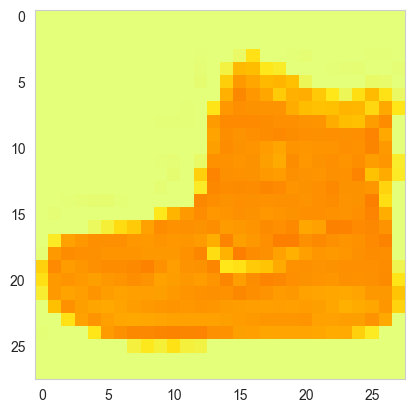

In [9]:
plt.imshow(train_images[0],cmap='Wistia')
plt.grid([])
plt.show()

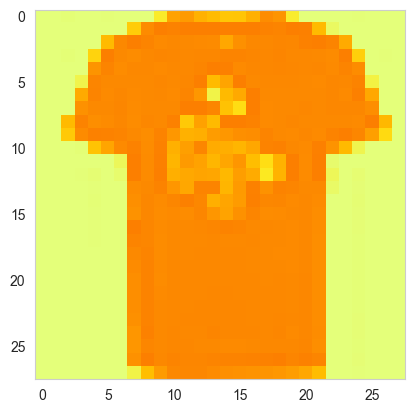

In [10]:
plt.imshow(train_images[237],cmap='Wistia')
plt.grid([])
plt.show()

In [11]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [12]:
class_names[train_labels[237]]

'T-shirt/top'

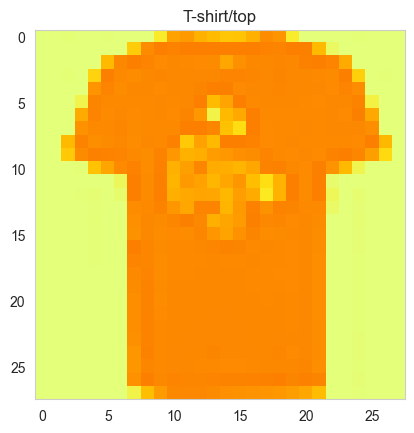

In [13]:
plt.imshow(train_images[237],cmap='Wistia')
plt.title(class_names[(train_labels[237])])
plt.grid([])
plt.show()

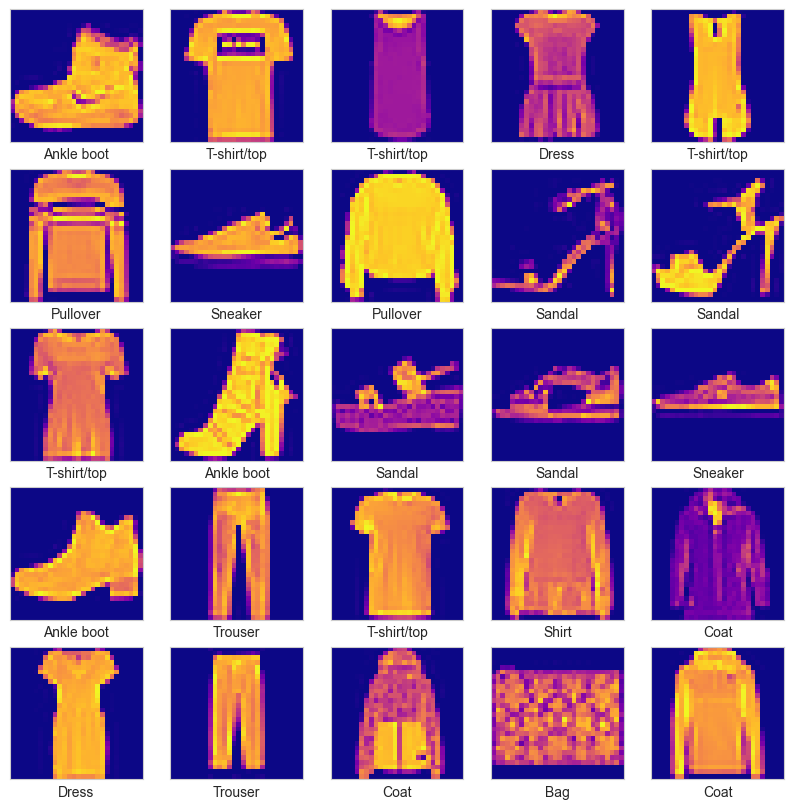

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='plasma')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
train_images = train_images / 255.0
test_image = test_image / 255.0

In [16]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

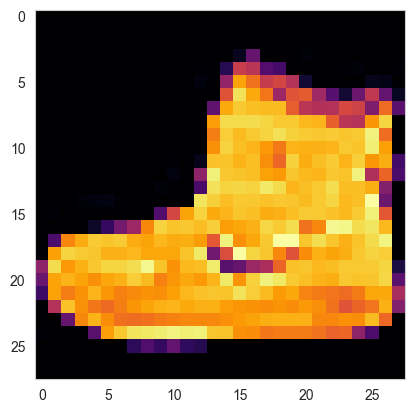

In [17]:
plt.imshow(train_images[0],cmap='inferno')
plt.grid([])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=15,verbose=1)

Epoch 1/15


C:\Users\VICTUS\.conda\envs\deepl\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 6s 4ms/step - loss: 0.4942 - accuracy: 0.8223 - val_loss: 0.4012 - val_accuracy: 0.8559
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8656 - val_loss: 0.3628 - val_accuracy: 0.8663
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3282 - accuracy: 0.8788 - val_loss: 0.3468 - val_accuracy: 0.8727
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3047 - accuracy: 0.8877 - val_loss: 0.3680 - val_accuracy: 0.8666
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2888 - accuracy: 0.8925 - val_loss: 0.3344 - val_accuracy: 0.8822
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.8986 - val_loss: 0.3407 - val_accuracy: 0.8815
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2537 - accuracy: 0.9043 - val_loss: 0.3486 - val_accuracy: 0.8798
Epo

In [22]:
history.history

{'loss': [0.49415573477745056,
  0.36896422505378723,
  0.3281981647014618,
  0.30469951033592224,
  0.28883686661720276,
  0.26852408051490784,
  0.25369489192962646,
  0.2455792874097824,
  0.2341834306716919,
  0.22272445261478424,
  0.21278420090675354,
  0.2053099125623703,
  0.19825008511543274,
  0.1920681744813919,
  0.1840752810239792],
 'accuracy': [0.8223333358764648,
  0.8655833601951599,
  0.8788124918937683,
  0.887708306312561,
  0.8925208449363708,
  0.898604154586792,
  0.9042708277702332,
  0.9082708358764648,
  0.9117291569709778,
  0.9168333411216736,
  0.9196666479110718,
  0.9223958253860474,
  0.925041675567627,
  0.9280833601951599,
  0.929979145526886],
 'val_loss': [0.40116122364997864,
  0.36278101801872253,
  0.3467719852924347,
  0.3680042624473572,
  0.3343624174594879,
  0.3406943678855896,
  0.34863904118537903,
  0.30844950675964355,
  0.3133796155452728,
  0.3319021761417389,
  0.3155926764011383,
  0.32475313544273376,
  0.318291574716568,
  0.3123376

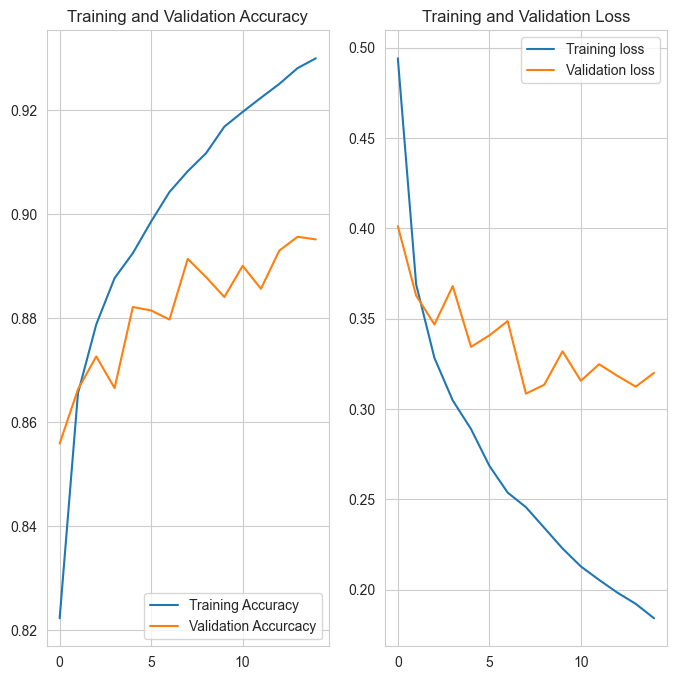

In [23]:
epochs = 15

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accurcacy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Callback / Early Stopping

In [24]:
model_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [25]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_new.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=4)

In [28]:
history = model_new.fit(train_images, train_labels, validation_split=0.2, epochs=30,verbose=1,callbacks=callback)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4911 - accuracy: 0.8240 - val_loss: 0.3833 - val_accuracy: 0.8616
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3708 - accuracy: 0.8641 - val_loss: 0.3644 - val_accuracy: 0.8681
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3302 - accuracy: 0.8778 - val_loss: 0.3445 - val_accuracy: 0.8786
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3047 - accuracy: 0.8873 - val_loss: 0.3650 - val_accuracy: 0.8698
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2855 - accuracy: 0.8951 - val_loss: 0.3474 - val_accuracy: 0.8733
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2708 - accuracy: 0.8992 - val_loss: 0.3282 - val_accuracy: 0.8841
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2553 - accuracy: 0.9057 - val_loss: 0.3211 - val_accuracy:

In [29]:
history.history

{'loss': [0.4910690486431122,
  0.37083080410957336,
  0.33022549748420715,
  0.30467188358306885,
  0.2854740619659424,
  0.27079859375953674,
  0.25530698895454407,
  0.2453218549489975,
  0.2349986433982849,
  0.22462362051010132,
  0.2148047536611557,
  0.20861567556858063],
 'accuracy': [0.8239791393280029,
  0.864062488079071,
  0.8778333067893982,
  0.887333333492279,
  0.8950833082199097,
  0.8992291688919067,
  0.9057499766349792,
  0.9079375267028809,
  0.9127916693687439,
  0.9146041870117188,
  0.9197291731834412,
  0.9200416803359985],
 'val_loss': [0.38327106833457947,
  0.3643629550933838,
  0.34448277950286865,
  0.36496052145957947,
  0.34741610288619995,
  0.3281809389591217,
  0.32111701369285583,
  0.3112607002258301,
  0.31520113348960876,
  0.3304842412471771,
  0.31843823194503784,
  0.3393491506576538],
 'val_accuracy': [0.8615833520889282,
  0.8680833578109741,
  0.8785833120346069,
  0.8697500228881836,
  0.8732500076293945,
  0.8840833306312561,
  0.888166666

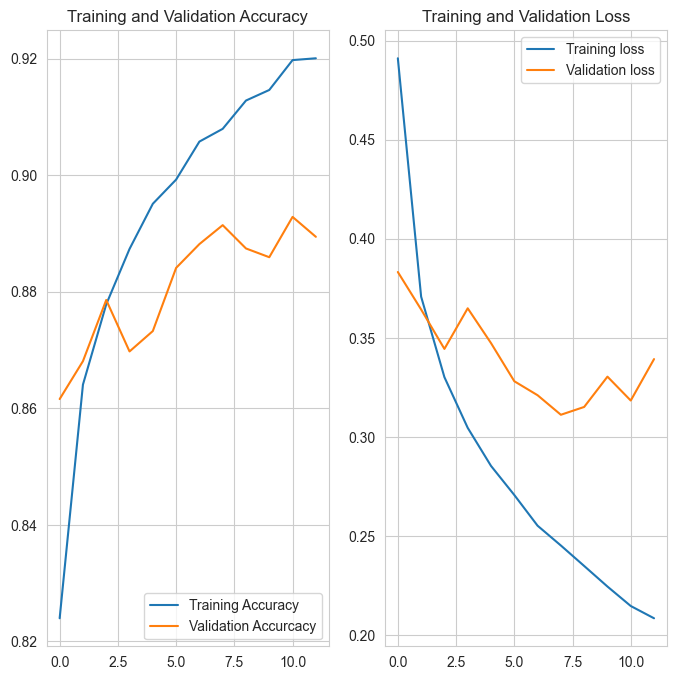

In [31]:
epochs = 12

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accurcacy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()